In [2]:
# importing libiraries
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# machine learning libraries
from sklearn.model_selection import cross_val_score
# train test split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [3]:
# read the data NSL_KDD_Train
train_df = pd.read_csv('NSL_KDD_Train.csv')
test_df = pd.read_csv('NSL_KDD_Test.csv')

In [4]:
train_df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [6]:
train_df.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.17', '2', '2.1', '0.18', '0.19', '0.20', '0.21', '1',
       '0.22', '0.23', '150', '25', '0.17.1', '0.03', '0.17.2', '0.24', '0.25',
       '0.26', '0.05', '0.27', 'normal'],
      dtype='object')

In [7]:
test_df.columns

Index(['0', 'tcp', 'private', 'REJ', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15',
       '0.16', '0.17', '0.18', '229', '10', '0.19', '0.20', '1', '1.1', '0.04',
       '0.06', '0.21', '255', '10.1', '0.04.1', '0.06.1', '0.22', '0.23',
       '0.24', '0.25', '1.2', '1.3', 'neptune'],
      dtype='object')

In [8]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'outcome'])

In [9]:
train_df.columns = columns
test_df.columns = columns

In [10]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [11]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


### EDA

In [12]:
# investigate the train_df columns
train_df['protocol_type'].value_counts()

tcp     102688
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

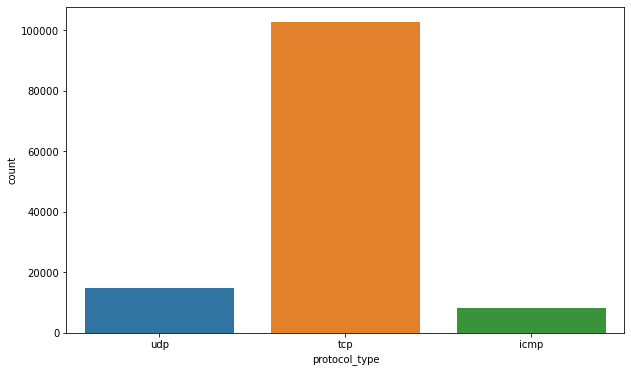

In [13]:
# plot the protocol_type distribution
plt.figure(figsize=(10,6))
sns.countplot(x='protocol_type', data=train_df)


In [14]:
train_df['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

<AxesSubplot:xlabel='count', ylabel='service'>

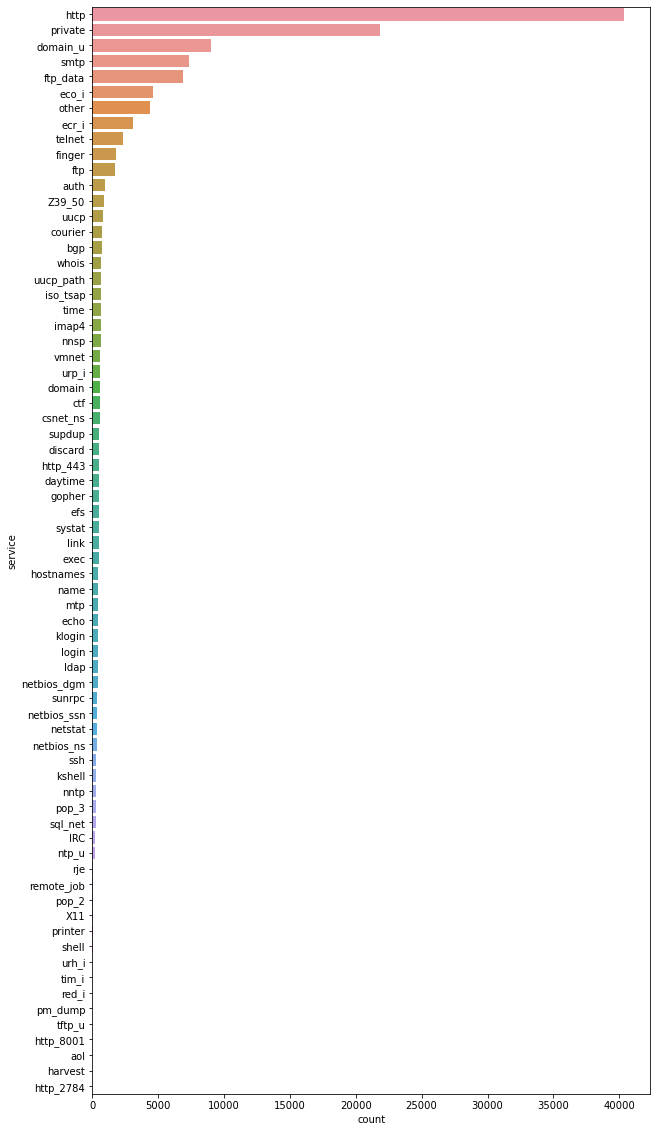

In [15]:
#plot the service distribution inverted bar chart and sort the values
# sort the values 
plt.figure(figsize=(10,20))
sns.countplot(y='service', data=train_df, order = train_df['service'].value_counts().index)


In [16]:
train_df['flag'].value_counts()

SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

<AxesSubplot:xlabel='flag', ylabel='count'>

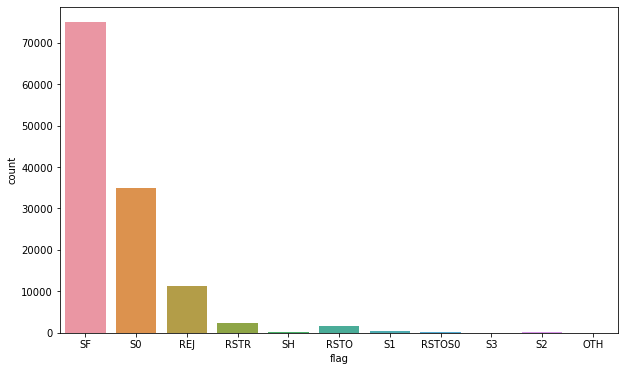

In [17]:
#plot the flag distribution
plt.figure(figsize=(10,6))
sns.countplot(x='flag', data=train_df)


<AxesSubplot:xlabel='count', ylabel='outcome'>

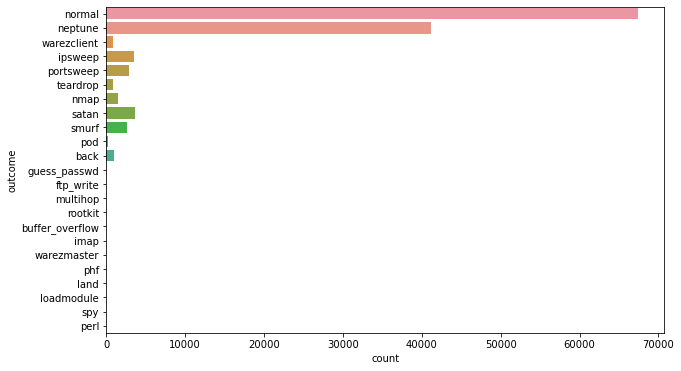

In [18]:
# plot the outcome distribution
plt.figure(figsize=(10,6))
sns.countplot(y='outcome', data=train_df)

Preprocessing

In [19]:
# convert protocol_type, service, flag to numerical in the same column 
train_df['protocol_type'] = train_df['protocol_type'].map({'tcp':0, 'udp':1, 'icmp':2})
test_df['protocol_type'] = test_df['protocol_type'].map({'tcp':0, 'udp':1, 'icmp':2})

In [20]:
train_df['protocol_type'].value_counts()

0    102688
1     14993
2      8291
Name: protocol_type, dtype: int64

In [21]:
test_df['protocol_type'].value_counts()

0    18879
1     2621
2     1043
Name: protocol_type, dtype: int64

In [22]:
# convert flag to numerical in the same column 
# don't use it manually with map, use get_dummies
train_df['flag'] = pd.factorize(train_df['flag'])[0]
test_df['flag'] = pd.factorize(test_df['flag'])[0]

In [23]:
train_df['flag'].value_counts()

0     74944
1     34851
2     11233
3      2421
5      1562
6       365
4       271
9       127
7       103
8        49
10       46
Name: flag, dtype: int64

In [24]:
test_df['flag'].value_counts()

1     14875
0      3849
3      2013
2       773
4       669
6       249
5        73
8        21
7        15
10        4
9         2
Name: flag, dtype: int64

In [25]:
dumm =pd.DataFrame(train_df['service'].value_counts())
dumm

,service
http,40338
private,21853
domain_u,9043
smtp,7313
ftp_data,6859
...,...
tftp_u,3
http_8001,2
aol,2
harvest,2


In [26]:
# use the data frame to convert service to numerical in the same column with replace
train_df['service'] = train_df['service'].factorize()[0]
test_df['service'] = test_df['service'].factorize()[0]

In [27]:
train_df['service'].value_counts()

2     40338
1     21853
11     9043
15     7313
4      6859
      ...  
68        3
65        2
66        2
69        2
67        1
Name: service, Length: 70, dtype: int64

In [28]:
test_df['service'].value_counts()

4     7853
0     4773
3     1626
8     1019
5      934
      ... 
58      11
61      10
57       8
53       6
63       1
Name: service, Length: 64, dtype: int64

In [29]:
train_df['outcome'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: outcome, dtype: int64

In [30]:
# drop the values below 200 in the train_df outcome column
train_df = train_df[train_df['outcome'].isin(train_df['outcome'].value_counts()[train_df['outcome'].value_counts() > 200].index)]

In [31]:
# drop the items in the test_df that are not in the train_df outcome column
test_df = test_df[test_df['outcome'].isin(train_df['outcome'])]

In [32]:
# drop the items in the train_df that are not in the test_df outcome column
train_df = train_df[train_df['outcome'].isin(test_df['outcome'])]

In [33]:
train_df['outcome'].value_counts()

normal       67342
neptune      41214
satan         3633
ipsweep       3599
portsweep     2931
smurf         2646
nmap          1493
back           956
teardrop       892
pod            201
Name: outcome, dtype: int64

In [34]:
test_df['outcome'].value_counts()

normal       9711
neptune      4656
satan         735
smurf         665
back          359
portsweep     157
ipsweep       141
nmap           73
pod            41
teardrop       12
Name: outcome, dtype: int64

In [35]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,1,0,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,0,1,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,0,2,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,0,2,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,0,1,2,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [36]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,0,1,1,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
4,0,0,4,1,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal
5,0,0,5,1,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,normal
7,0,0,4,1,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.0,0.00,0.00,normal


In [37]:
# check if the outcome is balanced
train_df['outcome'].value_counts()


normal       67342
neptune      41214
satan         3633
ipsweep       3599
portsweep     2931
smurf         2646
nmap          1493
back           956
teardrop       892
pod            201
Name: outcome, dtype: int64

In [38]:
# perform one hot encoding on the outcome column
train_df = pd.get_dummies(train_df, columns=['outcome'])
test_df = pd.get_dummies(test_df, columns=['outcome'])

In [39]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,outcome_back,outcome_ipsweep,outcome_neptune,outcome_nmap,outcome_normal,outcome_pod,outcome_portsweep,outcome_satan,outcome_smurf,outcome_teardrop
0,0,1,0,0,146,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,2,0,232,8153,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,2,0,199,420,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124907 entries, 0 to 125971
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     124907 non-null  int64  
 1   protocol_type                124907 non-null  int64  
 2   service                      124907 non-null  int64  
 3   flag                         124907 non-null  int64  
 4   src_bytes                    124907 non-null  int64  
 5   dst_bytes                    124907 non-null  int64  
 6   land                         124907 non-null  int64  
 7   wrong_fragment               124907 non-null  int64  
 8   urgent                       124907 non-null  int64  
 9   hot                          124907 non-null  int64  
 10  num_failed_logins            124907 non-null  int64  
 11  logged_in                    124907 non-null  int64  
 12  num_compromised              124907 non-null  int64  
 13 

In [41]:
# use the entire train_df to train the model 
X_train = train_df.drop(['outcome_normal', 'outcome_neptune', 'outcome_satan', 'outcome_ipsweep', 'outcome_portsweep', 'outcome_smurf', 'outcome_nmap', 'outcome_back', 'outcome_teardrop', 'outcome_pod'],axis = 1)
y_train = train_df[['outcome_normal', 'outcome_neptune', 'outcome_satan', 'outcome_ipsweep', 'outcome_portsweep', 'outcome_smurf', 'outcome_nmap', 'outcome_back', 'outcome_teardrop', 'outcome_pod']]
X_test = test_df.drop(['outcome_normal', 'outcome_neptune', 'outcome_satan', 'outcome_ipsweep', 'outcome_portsweep', 'outcome_smurf', 'outcome_nmap', 'outcome_back', 'outcome_teardrop', 'outcome_pod'],axis = 1)
y_test = test_df[['outcome_normal', 'outcome_neptune', 'outcome_satan', 'outcome_ipsweep', 'outcome_portsweep', 'outcome_smurf', 'outcome_nmap', 'outcome_back', 'outcome_teardrop', 'outcome_pod']]


In [42]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,0,0,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
1,0,0,1,1,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0,0,2,0,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0,0,2,0,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,0,1,2,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,1,1,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125968,8,1,1,0,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125969,0,0,15,0,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125970,0,0,35,1,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [43]:
y_train

,outcome_normal,outcome_neptune,outcome_satan,outcome_ipsweep,outcome_portsweep,outcome_smurf,outcome_nmap,outcome_back,outcome_teardrop,outcome_pod
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
125967,0,1,0,0,0,0,0,0,0,0
125968,1,0,0,0,0,0,0,0,0,0
125969,1,0,0,0,0,0,0,0,0,0
125970,0,1,0,0,0,0,0,0,0,0


In [44]:
X_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,2,0,1,1,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
4,0,0,4,1,267,14515,0,0,0,0,...,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00
5,0,0,5,1,1022,387,0,0,0,0,...,255,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04
7,0,0,4,1,327,467,0,0,0,0,...,151,255,1.00,0.00,0.01,0.03,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,0,2,11,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00
22538,0,0,5,1,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22539,0,0,4,1,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,0,4,1,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07


In [45]:
y_test

,outcome_normal,outcome_neptune,outcome_satan,outcome_ipsweep,outcome_portsweep,outcome_smurf,outcome_nmap,outcome_back,outcome_teardrop,outcome_pod
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
22537,0,0,0,0,0,1,0,0,0,0
22538,1,0,0,0,0,0,0,0,0,0
22539,1,0,0,0,0,0,0,0,0,0
22540,0,0,0,0,0,0,0,1,0,0


In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(124907, 41)
(124907, 10)
(16550, 41)
(16550, 10)


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [48]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=40,activation='tanh'))

model.add(Dense(units=20,activation='tanh'))

model.add(Dense(units=20,activation='tanh'))

model.add(Dense(units=10,activation='tanh'))

model.add(Dense(units=10,activation='tanh'))

model.add(Dense(units=5,activation='tanh'))

model.add(Dense(units=5,activation='tanh'))

model.add(Dense(units=10,activation='softmax'))



# For a binary classification problem
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1, batch_size=1000)

Epoch 1/600
125/125 [==============================] - 2s 15ms/step - loss: 0.0046 - accuracy: 0.9953 - val_loss: 0.0567 - val_accuracy: 0.9677
Epoch 2/600
125/125 [==============================] - 2s 14ms/step - loss: 0.0046 - accuracy: 0.9949 - val_loss: 0.0545 - val_accuracy: 0.9671
Epoch 3/600
125/125 [==============================] - 2s 14ms/step - loss: 0.0072 - accuracy: 0.9908 - val_loss: 0.0799 - val_accuracy: 0.9496
Epoch 4/600
125/125 [==============================] - 2s 14ms/step - loss: 0.0079 - accuracy: 0.9904 - val_loss: 0.0870 - val_accuracy: 0.9536
Epoch 5/600
125/125 [==============================] - 2s 14ms/step - loss: 0.0073 - accuracy: 0.9901 - val_loss: 0.0750 - val_accuracy: 0.9589
Epoch 6/600
125/125 [==============================] - 2s 13ms/step - loss: 0.0059 - accuracy: 0.9915 - val_loss: 0.1449 - val_accuracy: 0.8665
Epoch 7/600
125/125 [==============================] - 2s 14ms/step - loss: 0.0057 - accuracy: 0.9923 - val_loss: 0.1467 - val_accuracy:

In [ ]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

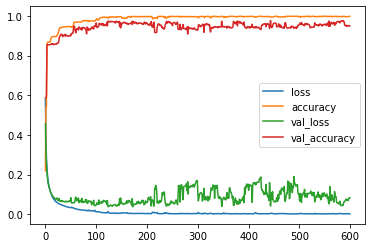

In [ ]:
model_loss.plot()

Trying with SDG and Early stopping 

In [ ]:
def sgd_optimizer():
    sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
    return sgd




In [ ]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=40,activation='tanh'))

model.add(Dense(units=20,activation='tanh'))

model.add(Dense(units=20,activation='tanh'))

model.add(Dense(units=10,activation='tanh'))

model.add(Dense(units=10,activation='tanh'))

model.add(Dense(units=5,activation='tanh'))

model.add(Dense(units=5,activation='tanh'))

model.add(Dense(units=10,activation='softmax'))



# For a binary classification problem
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=sgd_optimizer(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=25)

In [ ]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=0, batch_size=1000, callbacks=[early_stop])

Epoch 1/600
125/125 [==============================] - 3s 13ms/step - loss: 0.4917 - accuracy: 0.3850 - val_loss: 0.3718 - val_accuracy: 0.5868
Epoch 2/600
125/125 [==============================] - 1s 11ms/step - loss: 0.3132 - accuracy: 0.5391 - val_loss: 0.2678 - val_accuracy: 0.5868
Epoch 3/600
125/125 [==============================] - 1s 10ms/step - loss: 0.2504 - accuracy: 0.5391 - val_loss: 0.2320 - val_accuracy: 0.5868
Epoch 4/600
125/125 [==============================] - 1s 10ms/step - loss: 0.2262 - accuracy: 0.5391 - val_loss: 0.2161 - val_accuracy: 0.5868
Epoch 5/600
125/125 [==============================] - 1s 10ms/step - loss: 0.2145 - accuracy: 0.5391 - val_loss: 0.2076 - val_accuracy: 0.5868
Epoch 6/600
125/125 [==============================] - 1s 10ms/step - loss: 0.2081 - accuracy: 0.5391 - val_loss: 0.2029 - val_accuracy: 0.5868
Epoch 7/600
125/125 [==============================] - 1s 10ms/step - loss: 0.2043 - accuracy: 0.5391 - val_loss: 0.1999 - val_accuracy:

In [290]:
model_loss = pd.DataFrame(model.history.history)


<AxesSubplot:>

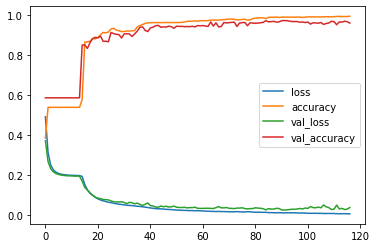

In [291]:
model_loss.plot()


In [293]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


518/518 [==============================] - 3s 5ms/step - loss: 0.0374 - accuracy: 0.9611

accuracy: 96.11%


In [302]:
X_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,2,0,1,1,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
4,0,0,4,1,267,14515,0,0,0,0,...,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00
5,0,0,5,1,1022,387,0,0,0,0,...,255,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04
7,0,0,4,1,327,467,0,0,0,0,...,151,255,1.00,0.00,0.01,0.03,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,0,2,11,1,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00
22538,0,0,5,1,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22539,0,0,4,1,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,0,4,1,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07


In [297]:
predict_x=model.predict(X_test) 
predict_x

518/518 [==============================] - 2s 3ms/step


array([[3.3890800e-08, 9.9999869e-01, 5.2083431e-07, ..., 1.4888946e-11,
        9.2627076e-08, 3.7887471e-08],
       [9.9970490e-01, 3.0281111e-08, 5.6899539e-06, ..., 1.4471954e-04,
        1.8296099e-09, 8.1675120e-05],
       [9.9999535e-01, 3.9505772e-09, 1.8721911e-06, ..., 6.2509565e-07,
        2.4995251e-11, 1.3716970e-06],
       ...,
       [9.9999559e-01, 3.3725922e-09, 1.6288298e-06, ..., 6.5490048e-07,
        2.1818766e-11, 1.3692467e-06],
       [1.7392850e-02, 2.2903808e-07, 1.9087563e-05, ..., 9.6034855e-01,
        4.0615209e-06, 5.4725115e-03],
       [9.9999583e-01, 2.9610372e-09, 1.4541528e-06, ..., 6.7572745e-07,
        1.9533947e-11, 1.3680018e-06]], dtype=float32)

In [298]:
classes_x=np.argmax(predict_x,axis=1)

In [299]:
classes_x

array([1, 0, 0, ..., 0, 7, 0], dtype=int64)

In [306]:
# get the real classes from the one hot encoding
y_test_classes = np.argmax(y_test.values, axis=1)
y_test_classes

array([1, 0, 0, ..., 0, 7, 0], dtype=int64)

In [308]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_classes,classes_x))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9711
           1       1.00      0.99      0.99      4656
           2       0.71      0.96      0.82       735
           3       0.94      0.95      0.94       141
           4       0.51      0.64      0.57       157
           5       1.00      0.85      0.92       665
           6       0.58      0.96      0.72        73
           7       0.98      0.89      0.93       359
           8       0.13      0.42      0.20        12
           9       0.00      0.00      0.00        41

    accuracy                           0.96     16550
   macro avg       0.68      0.76      0.71     16550
weighted avg       0.97      0.96      0.96     16550



<AxesSubplot:>

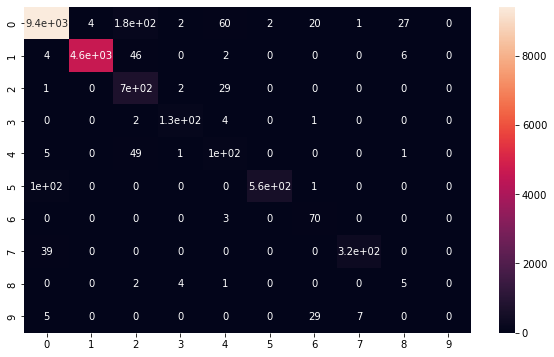

In [309]:
# plot the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test_classes, classes_x)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
